In [79]:
import numpy as np
import pandas as pd

health = pd.read_csv('/Users/elenayun/Desktop/DG/Healthcare.csv')

In [80]:
health

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


In [47]:
# Get the columns that contain Unknown values 

# Define the keyword Unknown
keyword = 'Unknown'

# Create an empty list to store column names containing the keyword
columns_with_keyword = []

# Loop through the columns and check for the keyword in their values
for column in health.columns:
    if health[column].astype(str).str.contains(keyword).any():
        columns_with_keyword.append(column)

# Print the column names containing the keyword
print("Columns containing the keyword '{}':".format(keyword))
for column in columns_with_keyword:
    print(column)

Columns containing the keyword 'Unknown':
Race
Ethnicity
Region
Ntm_Speciality
Ntm_Speciality_Bucket
Risk_Segment_During_Rx
Tscore_Bucket_During_Rx
Change_T_Score
Change_Risk_Segment


In [81]:
# Imputation with the Most Frequent Category
health_another = health.copy()

# Calculate the mode (most frequent category) of the column
most_frequent_category = health_another['Ntm_Speciality'].mode()[0]
most_frequent_category_2 = health_another['Risk_Segment_During_Rx'].mode()[0]
most_frequent_category_3 = health_another['Race'].mode()[0]
most_frequent_category_4 = health_another['Tscore_Bucket_During_Rx'].mode()[0]
most_frequent_category_5 = health_another['Change_T_Score'].mode()[0]
most_frequent_category_6 = health_another['Change_Risk_Segment'].mode()[0]
most_frequent_category_7 = health_another['Ethnicity'].mode()[0]
most_frequent_category_8 = health_another['Region'].mode()[0]

# Replace 'Unknown' values with the most frequent category
health_another['Ntm_Speciality'].replace('Unknown', most_frequent_category, inplace=True)
health_another['Risk_Segment_During_Rx'].replace('Unknown', most_frequent_category_2, inplace=True)
health_another['Race'].replace('Other/Unknown', most_frequent_category_2, inplace=True)
health_another['Change_T_Score'].replace('Unknown', most_frequent_category_4, inplace=True)
health_another['Change_Risk_Segment'].replace('Unknown', most_frequent_category_5, inplace=True)
health_another['Ntm_Speciality'].replace('Unknown', most_frequent_category_6, inplace=True)
health_another['Ethnicity'].replace('Unknown', most_frequent_category_6, inplace=True)
health_another['Region'].replace('Other/Unknown', most_frequent_category_6, inplace=True)


In [72]:
# Create a New Category for Unknown Values

health_another_2 = health.copy()

# Replace 'Unknown' values with a new category 'Missing' or 'Other'
health_another_2['Ntm_Speciality'].replace('Unknown', 'Missing', inplace=True)
health_another_2['Risk_Segment_During_Rx'].replace('Unknown', 'Missing', inplace=True)
health_another_2['Change_T_Score'].replace('Unknown', 'Missing', inplace=True)
health_another_2['Change_Risk_Segment'].replace('Unknown','Missing', inplace=True)
health_another_2['Ntm_Speciality'].replace('Unknown', 'Missing', inplace=True)
health_another_2['Ethnicity'].replace('Unknown', 'Missing', inplace=True)


In [83]:
health_another = health_another.drop(columns=['Ntm_Speciality_Bucket'])

selected=health_another.iloc[:,2:len(health_another.columns)].columns

features_selected = selected.tolist()

In [86]:
health_another.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx',
       'Dexa_Freq_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_O

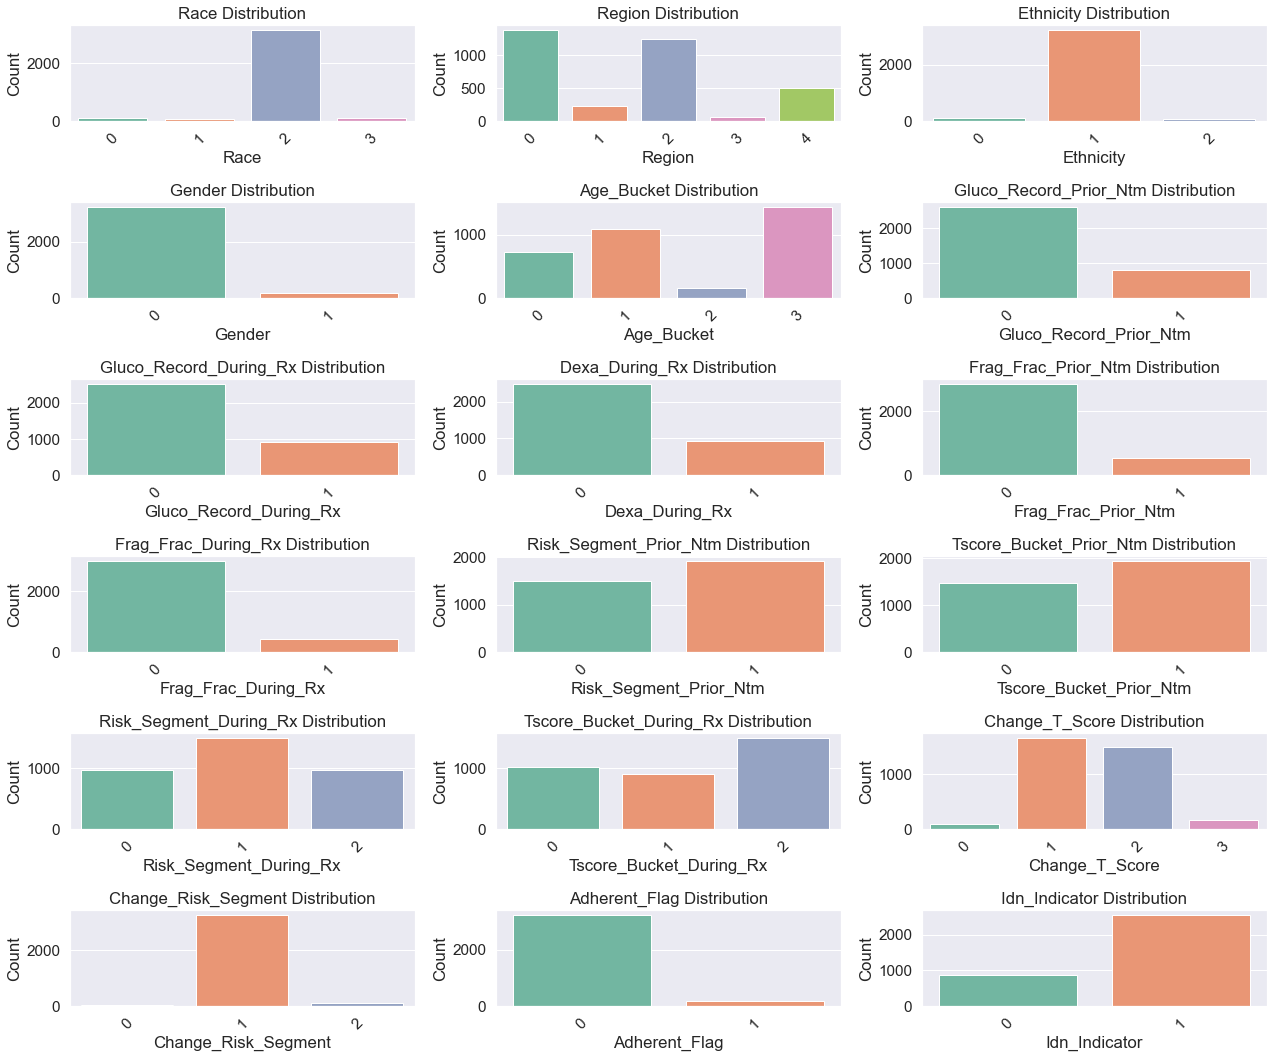

In [177]:
# Data Summary and Distribution:

import matplotlib.pyplot as plt
import seaborn as sns

# CCount the number of unique values for categorical features

# Categorical features - demo, clinical 
categorical_features = ['Race', 'Region', 'Ethnicity', 'Gender', 'Age_Bucket','Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx',
  'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator',]

# Count unique values for each categorical feature
unique_value_counts = health_another[categorical_features].nunique()

# Plot bar charts for categorical features
plt.figure(figsize=(18, 15))  # Adjust the figure size
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(6, 3, i)  # 5 rows, 4 columns
    sns.countplot(data=health_another, x=feature, palette='Set2')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'{feature} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [102]:
len(categorical_features)

25

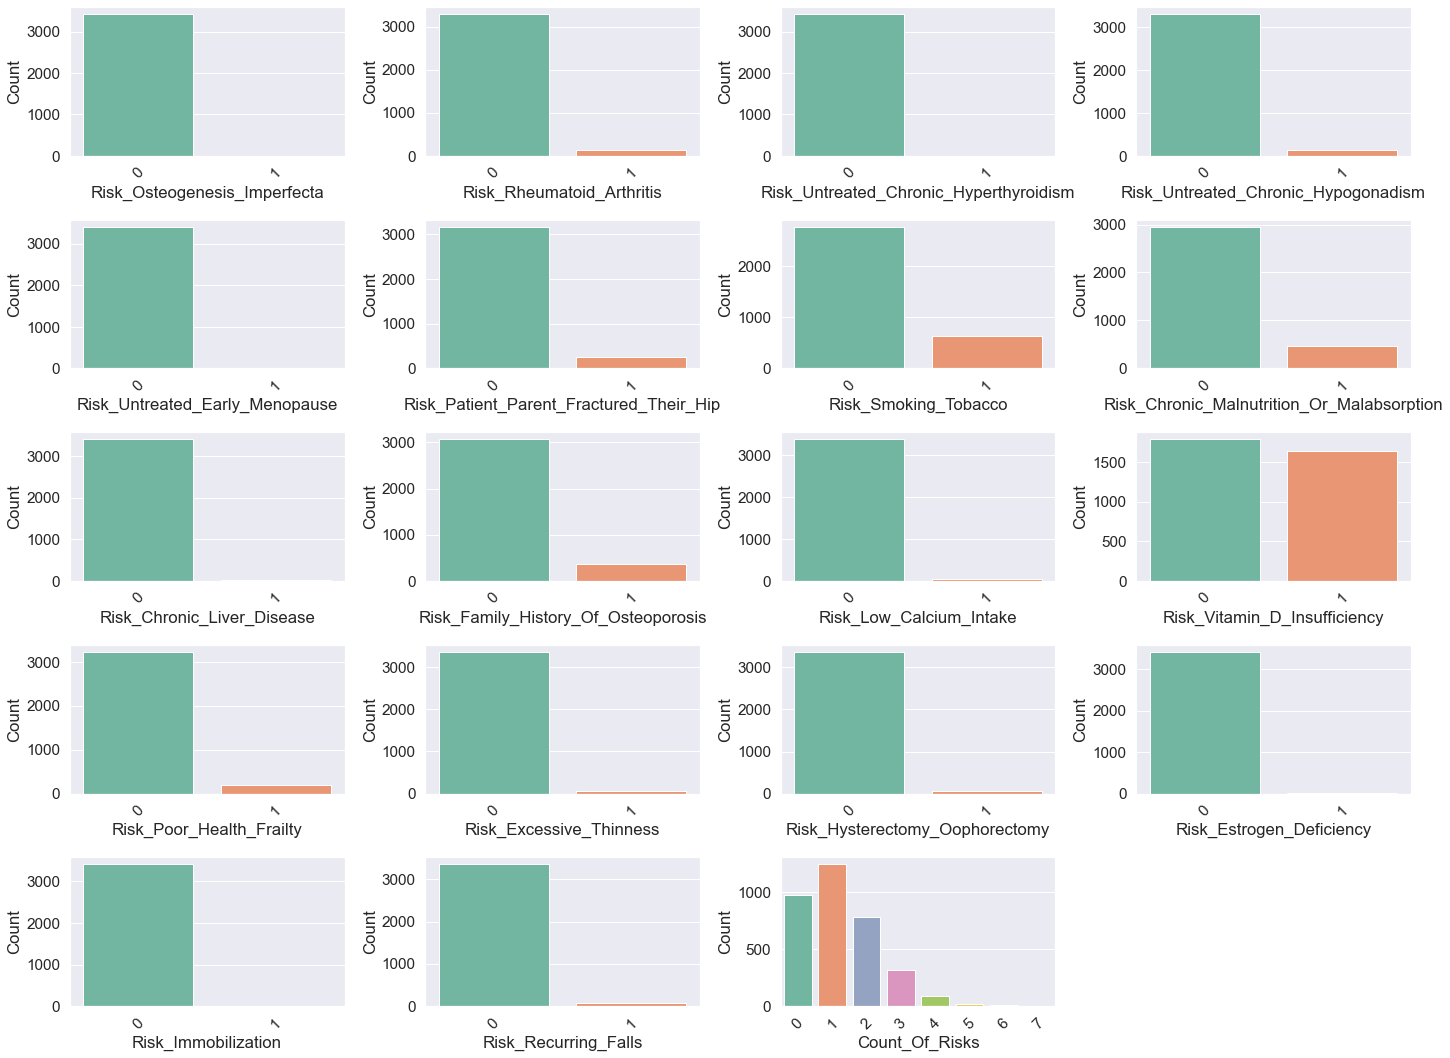

In [184]:
# Categorical features - risk factors 
categorical_features = ['Risk_Osteogenesis_Imperfecta', 'Risk_Rheumatoid_Arthritis',
       'Risk_Untreated_Chronic_Hyperthyroidism',
       'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Untreated_Early_Menopause',
       'Risk_Patient_Parent_Fractured_Their_Hip', 'Risk_Smoking_Tobacco',
       'Risk_Chronic_Malnutrition_Or_Malabsorption',
       'Risk_Chronic_Liver_Disease', 'Risk_Family_History_Of_Osteoporosis',
       'Risk_Low_Calcium_Intake', 'Risk_Vitamin_D_Insufficiency',
       'Risk_Poor_Health_Frailty', 'Risk_Excessive_Thinness',
       'Risk_Hysterectomy_Oophorectomy', 'Risk_Estrogen_Deficiency',
       'Risk_Immobilization', 'Risk_Recurring_Falls', 'Count_Of_Risks']

# Count unique values for each categorical feature
unique_value_counts = health_another[categorical_features].nunique()

# Plot bar charts for categorical features
plt.figure(figsize=(20, 15))  # Adjust the figure size
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 4, i)  # 5 rows, 4 columns
    sns.countplot(data=health_another, x=feature, palette='Set2')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

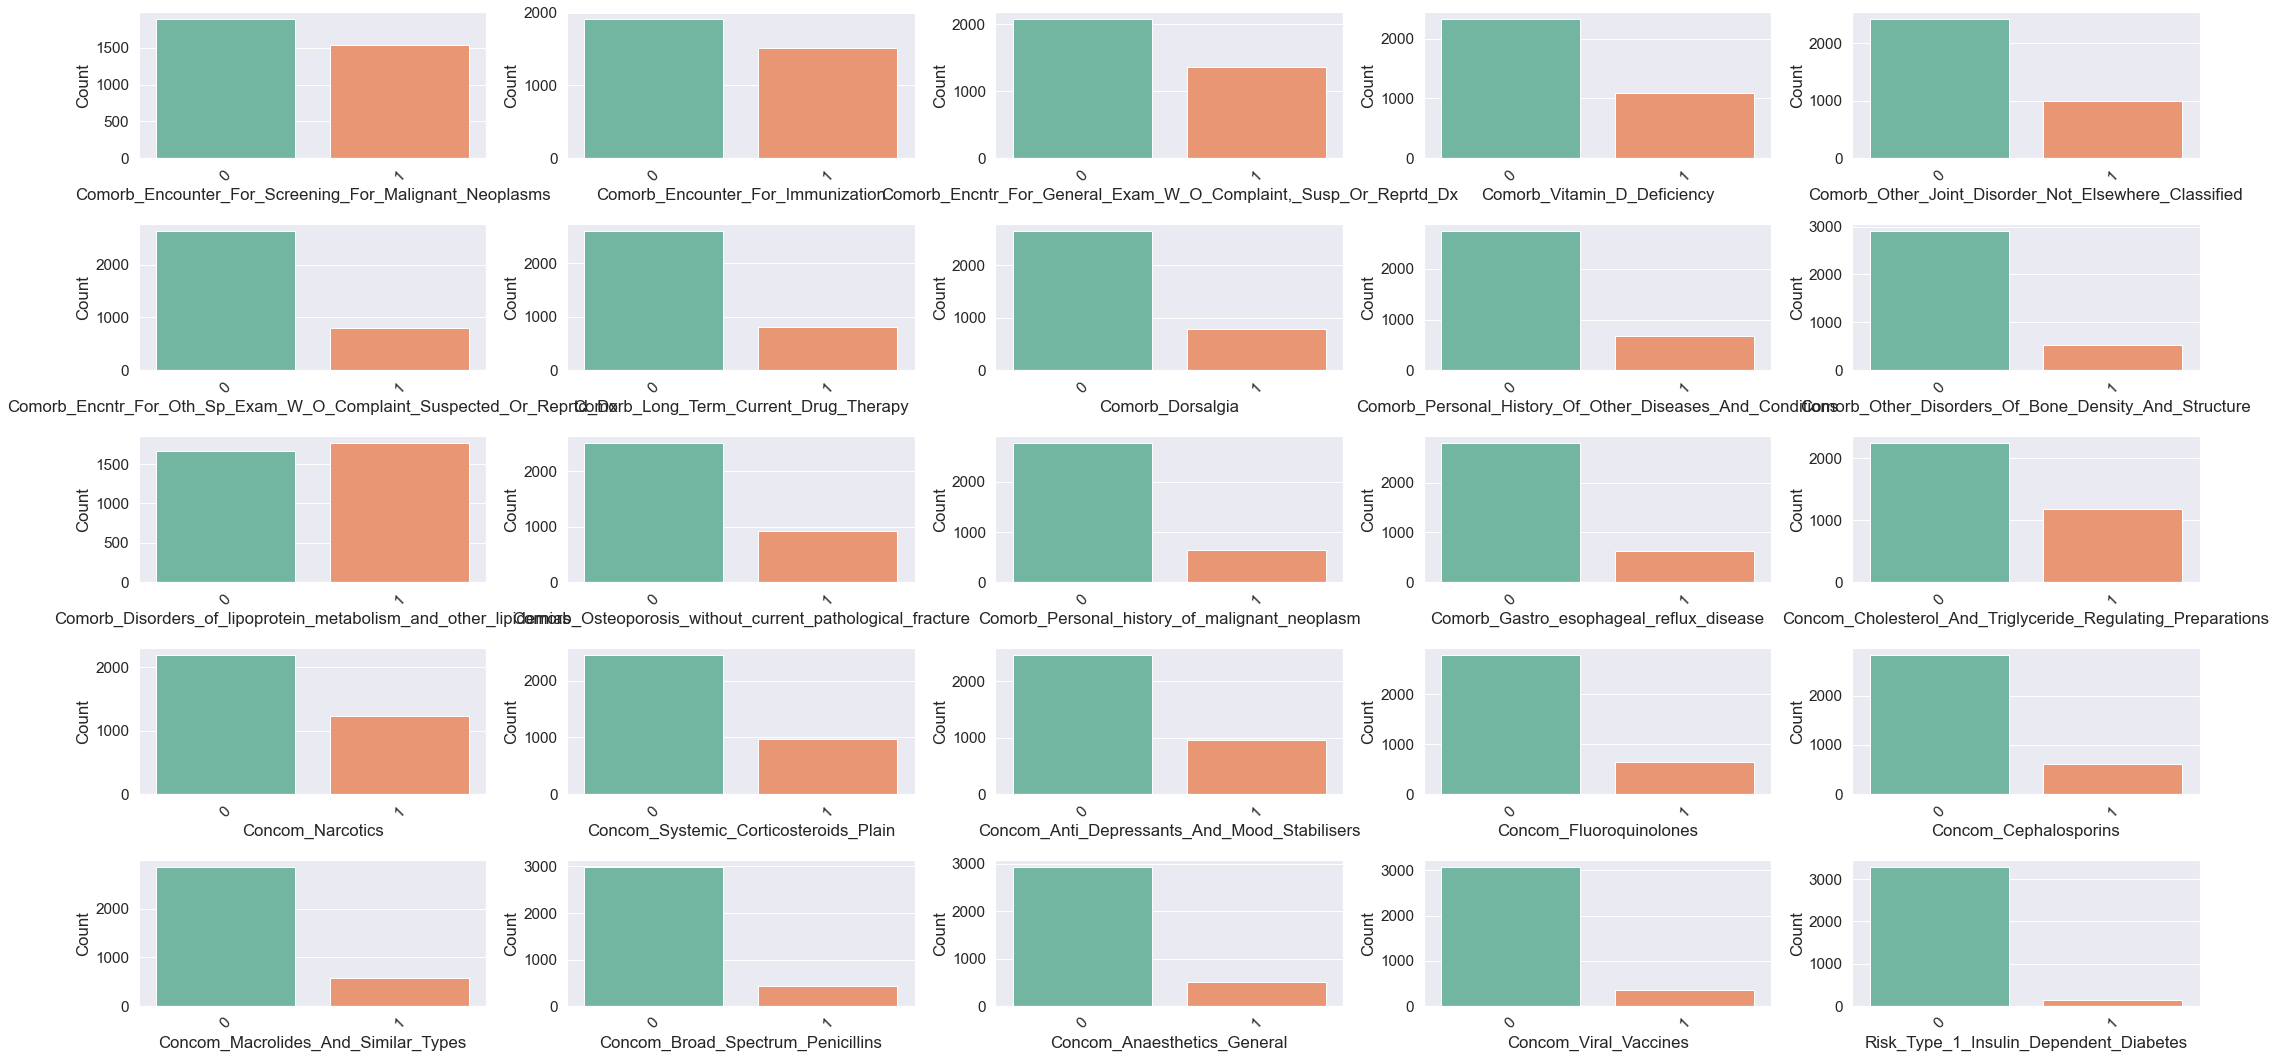

In [183]:
# Categorical features - comobordities
categorical_features = ['Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'Comorb_Osteoporosis_without_current_pathological_fracture',
       'Comorb_Personal_history_of_malignant_neoplasm',
       'Comorb_Gastro_esophageal_reflux_disease',
       'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
       'Concom_Narcotics', 'Concom_Systemic_Corticosteroids_Plain',
       'Concom_Anti_Depressants_And_Mood_Stabilisers',
       'Concom_Fluoroquinolones', 'Concom_Cephalosporins',
       'Concom_Macrolides_And_Similar_Types',
       'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General',
       'Concom_Viral_Vaccines', 'Risk_Type_1_Insulin_Dependent_Diabetes',]


# Count unique values for each categorical feature
unique_value_counts = health_another[categorical_features].nunique()

# Plot bar charts for categorical features
plt.figure(figsize=(30, 15))  # Adjust the figure size
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 5, i)  # 5 rows, 5 columns
    sns.countplot(data=health_another, x=feature, palette='Set2')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Persistency_Flag
Non-Persistent    62.353972
Persistent        37.646028
Name: proportion, dtype: float64


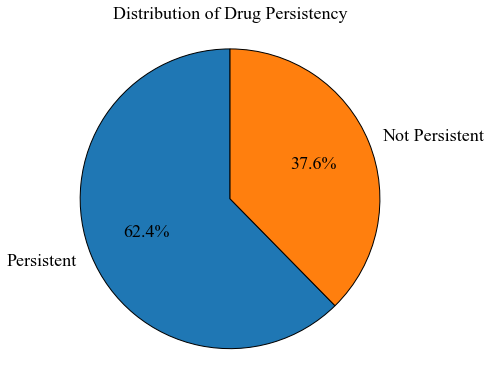

In [125]:
# Assuming you have a DataFrame with the target variable named 'Persistency_Flag'
# Calculate the percentage of "persistent" and "non-persistent" patients
class_distribution = health_another['Persistency_Flag'].value_counts(normalize=True) * 100

# Print the class distribution
print(class_distribution)


# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_distribution, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'},textprops={'fontsize': 18})
plt.title('Distribution of Drug Persistency', fontsize=18,pad=18)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()


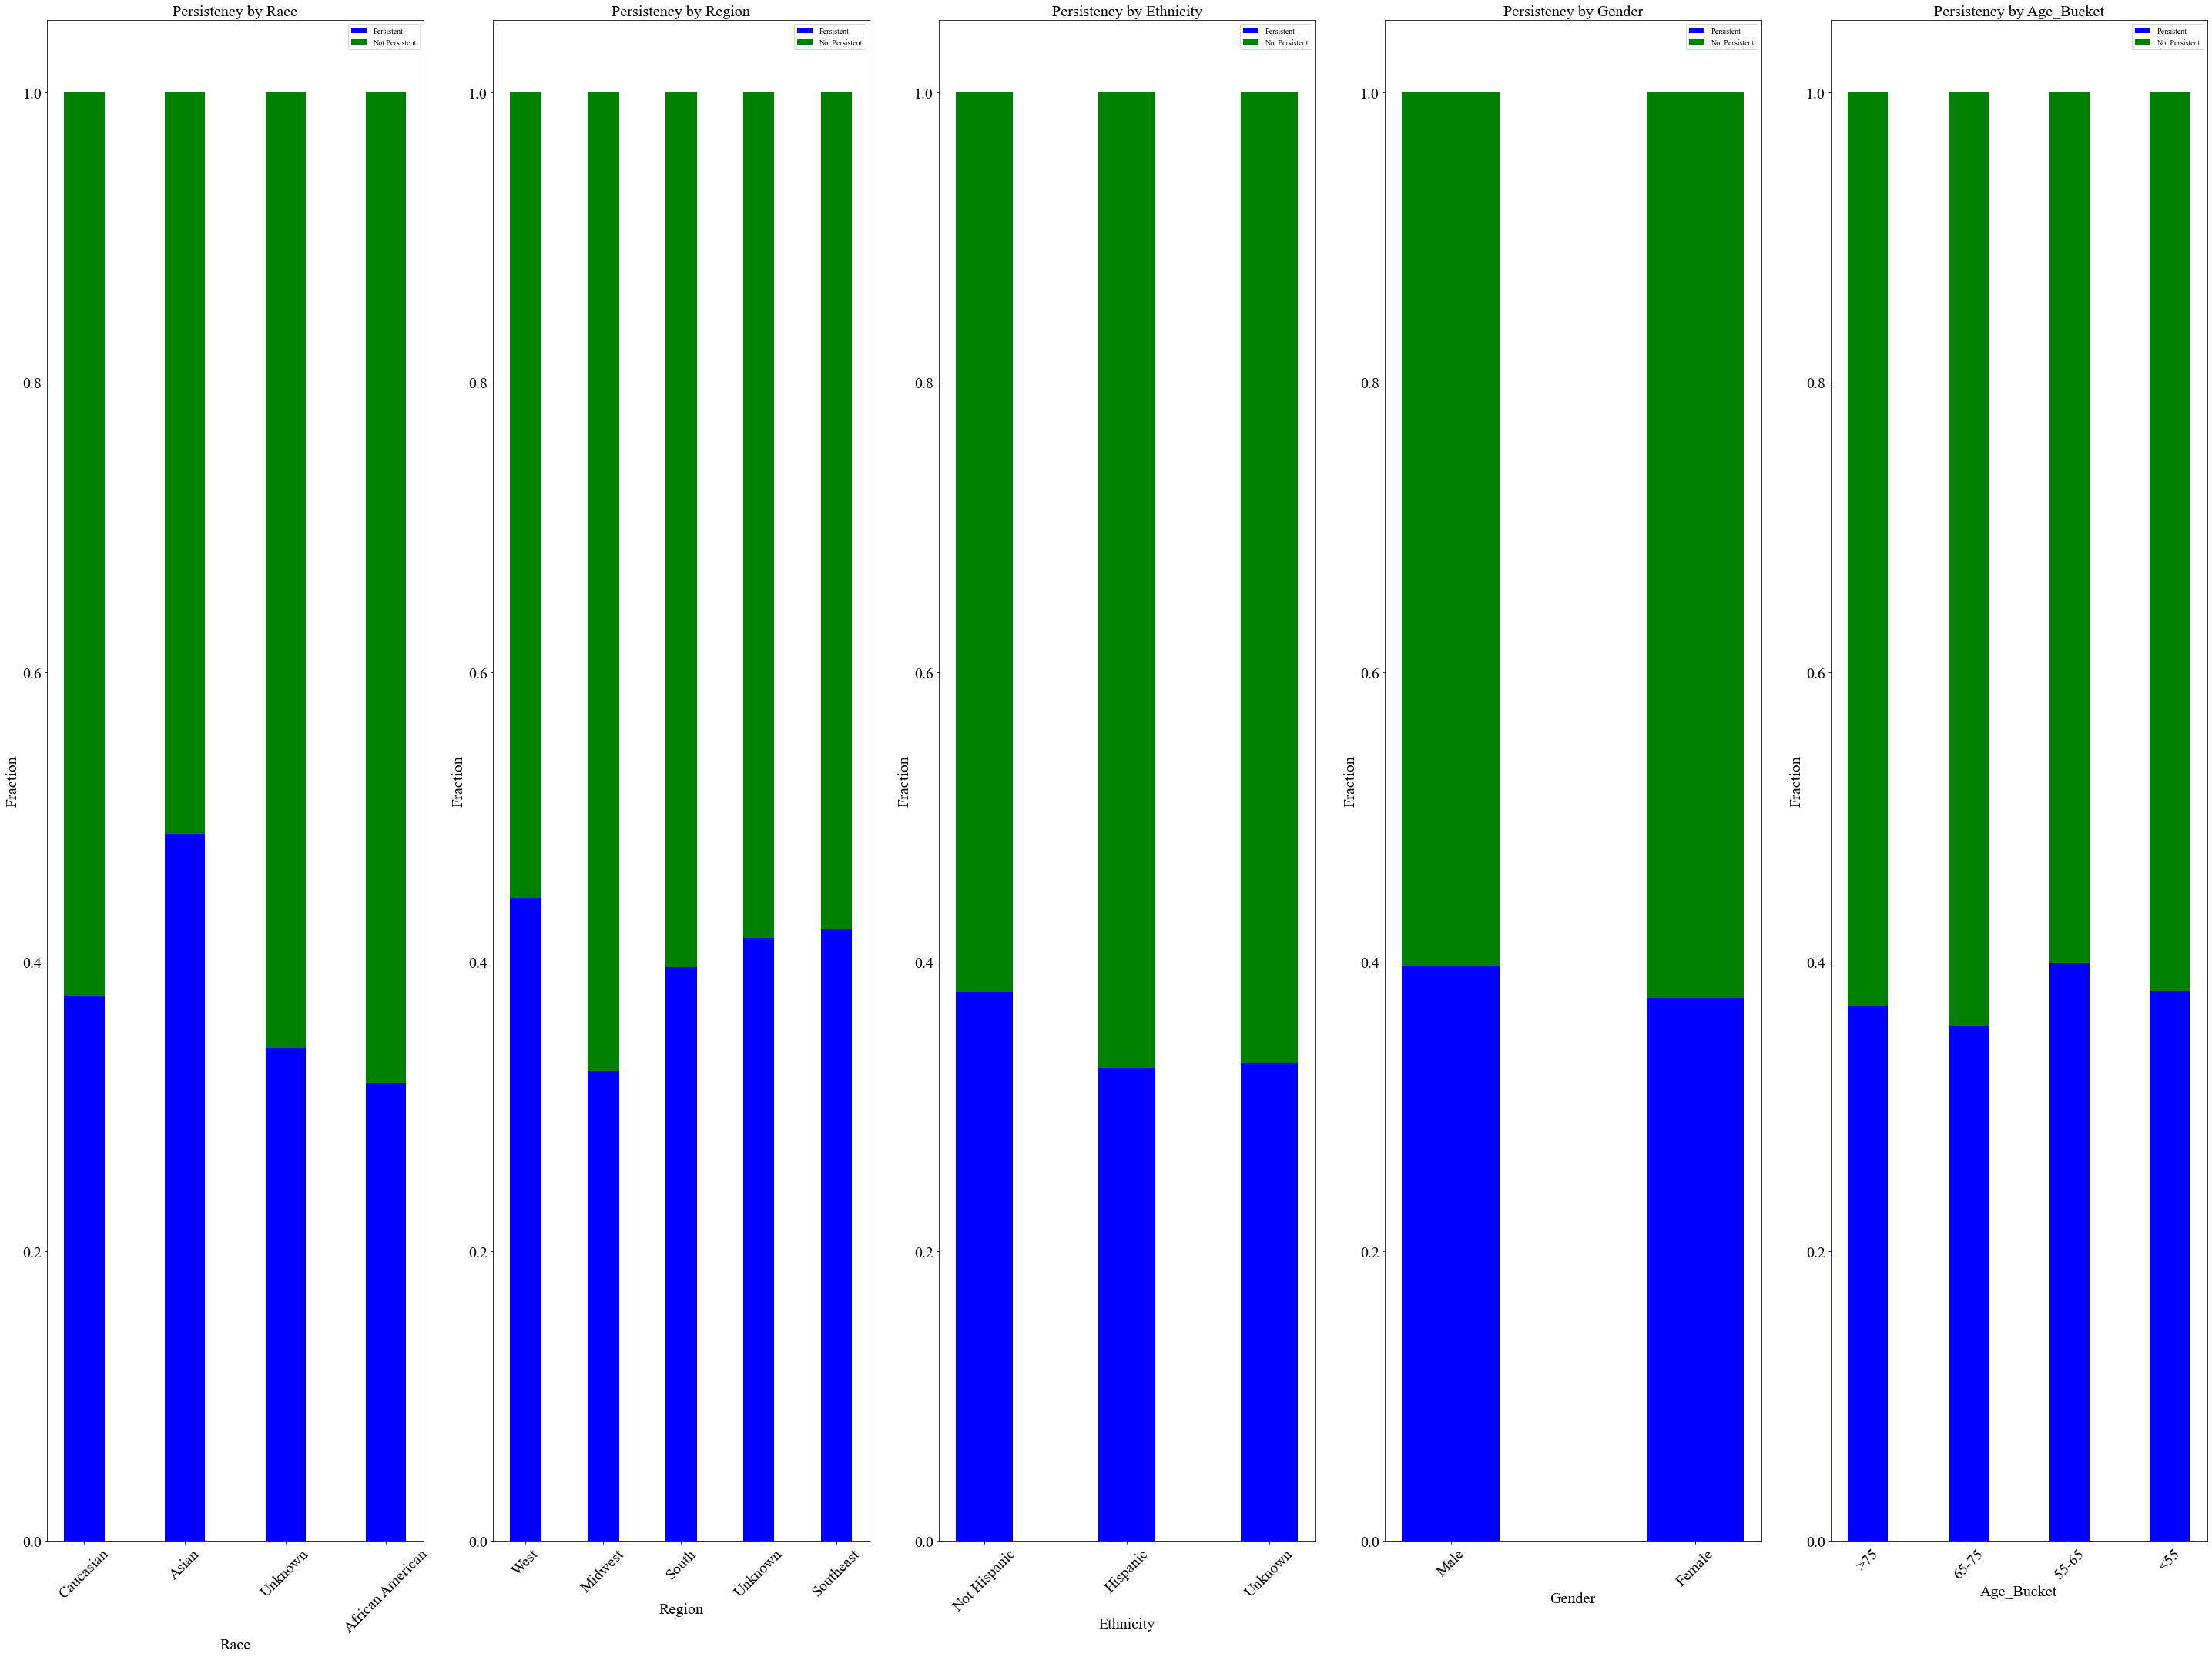

In [134]:
import matplotlib.pyplot as plt

# Define your demographics labels and categories
demographics_labels = {
    'Race': ['Caucasian', 'Asian', 'Unknown', 'African American'],
    'Region': ['West', 'Midwest', 'South', 'Unknown', 'Southeast'],
    'Ethnicity': ['Not Hispanic', 'Hispanic', 'Unknown'],
    'Gender': ['Male', 'Female'],
    'Age_Bucket': ['>75', '65-75', '55-65', '<55'],
}

# Create a 2x4 grid of subplots
fig, axs = plt.subplots(1, 5, figsize=(40, 30))
plt.subplots_adjust(wspace=0.5)  # Adjust the spacing between subplots

# Demographic categories
demographics = ['Race', 'Region', 'Ethnicity', 'Gender', 'Age_Bucket']

# Iterate through demographics and create bar charts
for i, demographic in enumerate(demographics):
    # Get the labels and categories for the current demographic
    labels = demographics_labels[demographic]
    categories = health_another[demographic].unique()  # Assuming 'health_another' is your DataFrame
    
    # Initialize lists to store the fraction of persistent and non-persistent patients for each category
    persistent_fraction = []
    not_persistent_fraction = []
    
    # Calculate the fraction of patients for each category
    for category in categories:
        total_count = len(health_another[health_another[demographic] == category])
        persistent_count = len(health_another[(health_another[demographic] == category) & (health_another['Persistency_Flag'] == 'Persistent')])
        not_persistent_count = total_count - persistent_count
        
        # Calculate fractions
        persistent_fraction.append(persistent_count / total_count)
        not_persistent_fraction.append(not_persistent_count / total_count)
    
    # Create bar charts for the current demographic
    ax = axs[i]  # Get the current subplot
    x = range(len(labels))  # X-axis positions for bars
    
    ax.bar(x, persistent_fraction, width=0.4, label='Persistent', color='b', align='center')
    ax.bar(x, not_persistent_fraction, width=0.4, label='Not Persistent', color='g', bottom=persistent_fraction, align='center')
    
    ax.set_xlabel(demographic,fontsize=20)
    ax.set_ylabel('Fraction',fontsize=20)
    ax.set_title(f'Persistency by {demographic}',fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45,fontsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.legend()

# Show the subplots
plt.tight_layout()
plt.show()


In [169]:
health_another.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx',
       'Dexa_Freq_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_O

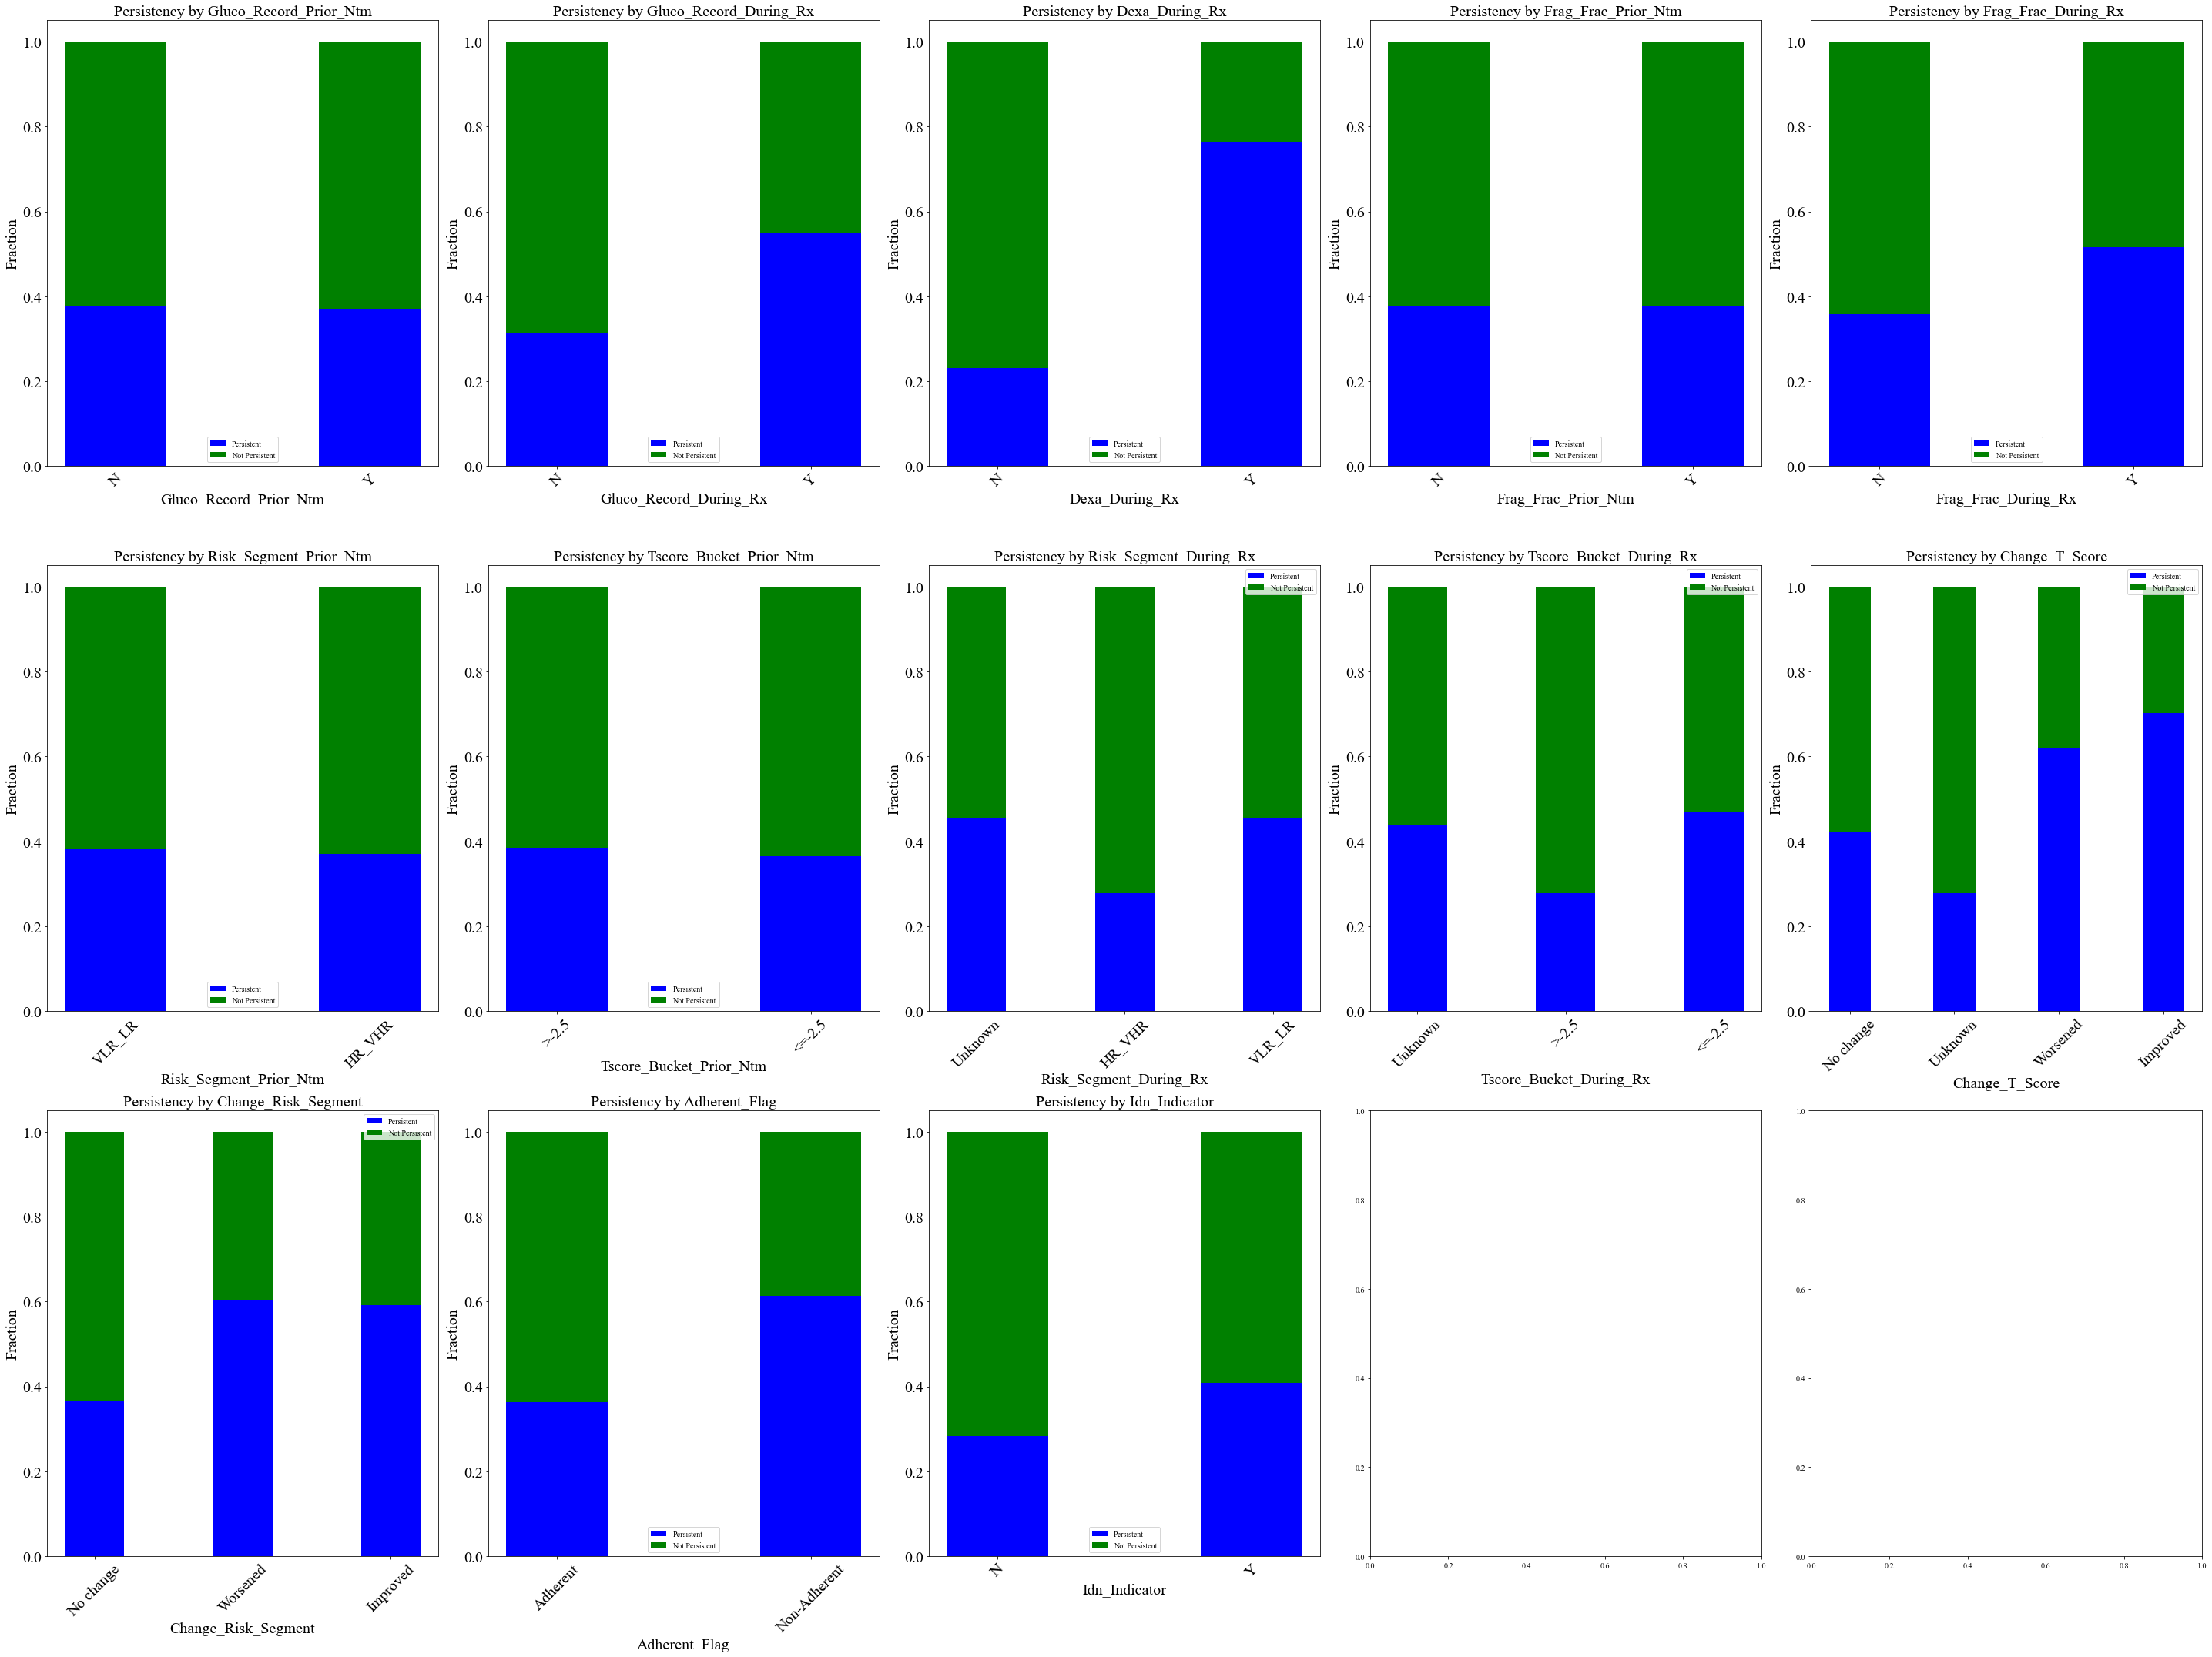

In [145]:
# Define your demographics labels and categories
demographics_labels = {
    'Gluco_Record_Prior_Ntm' :['N','Y'], 'Gluco_Record_During_Rx':['N','Y'],
  'Dexa_During_Rx':['N','Y'], 'Frag_Frac_Prior_Ntm':['N','Y'],
       'Frag_Frac_During_Rx':['N','Y'], 'Risk_Segment_Prior_Ntm':['VLR_LR','HR_VHR'],
       'Tscore_Bucket_Prior_Ntm':['>-2.5','<=-2.5'], 'Risk_Segment_During_Rx':['Unknown','HR_VHR','VLR_LR'],
       'Tscore_Bucket_During_Rx':['Unknown','>-2.5','<=-2.5'], 'Change_T_Score':['No change','Unknown','Worsened',
                                                                                'Improved'], 'Change_Risk_Segment':
    ['No change','Worsened',
'Improved'],
       'Adherent_Flag':['Adherent','Non-Adherent'], 'Idn_Indicator':['N','Y'],
}

# Create a 2x4 grid of subplots
fig, axs = plt.subplots(3, 5, figsize=(40, 30))
plt.subplots_adjust(wspace=0.5)  # Adjust the spacing between subplots

# Demographic categories
demographics = ['Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx',
  'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator',]

# Iterate through demographics and create bar charts
for i, demographic in enumerate(demographics):
    # Get the labels and categories for the current demographic
    labels = demographics_labels[demographic]
    categories = health_another[demographic].unique()  # Assuming 'health_another' is your DataFrame
    
    # Initialize lists to store the fraction of persistent and non-persistent patients for each category
    persistent_fraction = []
    not_persistent_fraction = []
    
    # Calculate the fraction of patients for each category
    for category in categories:
        total_count = len(health_another[health_another[demographic] == category])
        persistent_count = len(health_another[(health_another[demographic] == category) & (health_another['Persistency_Flag'] == 'Persistent')])
        not_persistent_count = total_count - persistent_count
        
        # Calculate fractions
        persistent_fraction.append(persistent_count / total_count)
        not_persistent_fraction.append(not_persistent_count / total_count)
    
    # Create bar charts for the current demographic
    ax = axs[i//5, i%5]  # Get the current subplot
    x = range(len(labels))  # X-axis positions for bars
    
    ax.bar(x, persistent_fraction, width=0.4, label='Persistent', color='b', align='center')
    ax.bar(x, not_persistent_fraction, width=0.4, label='Not Persistent', color='g', bottom=persistent_fraction, align='center')
    
    ax.set_xlabel(demographic,fontsize=20)
    ax.set_ylabel('Fraction',fontsize=20)
    ax.set_title(f'Persistency by {demographic}',fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45,fontsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.legend()

# Show the subplots
plt.tight_layout()
plt.show()


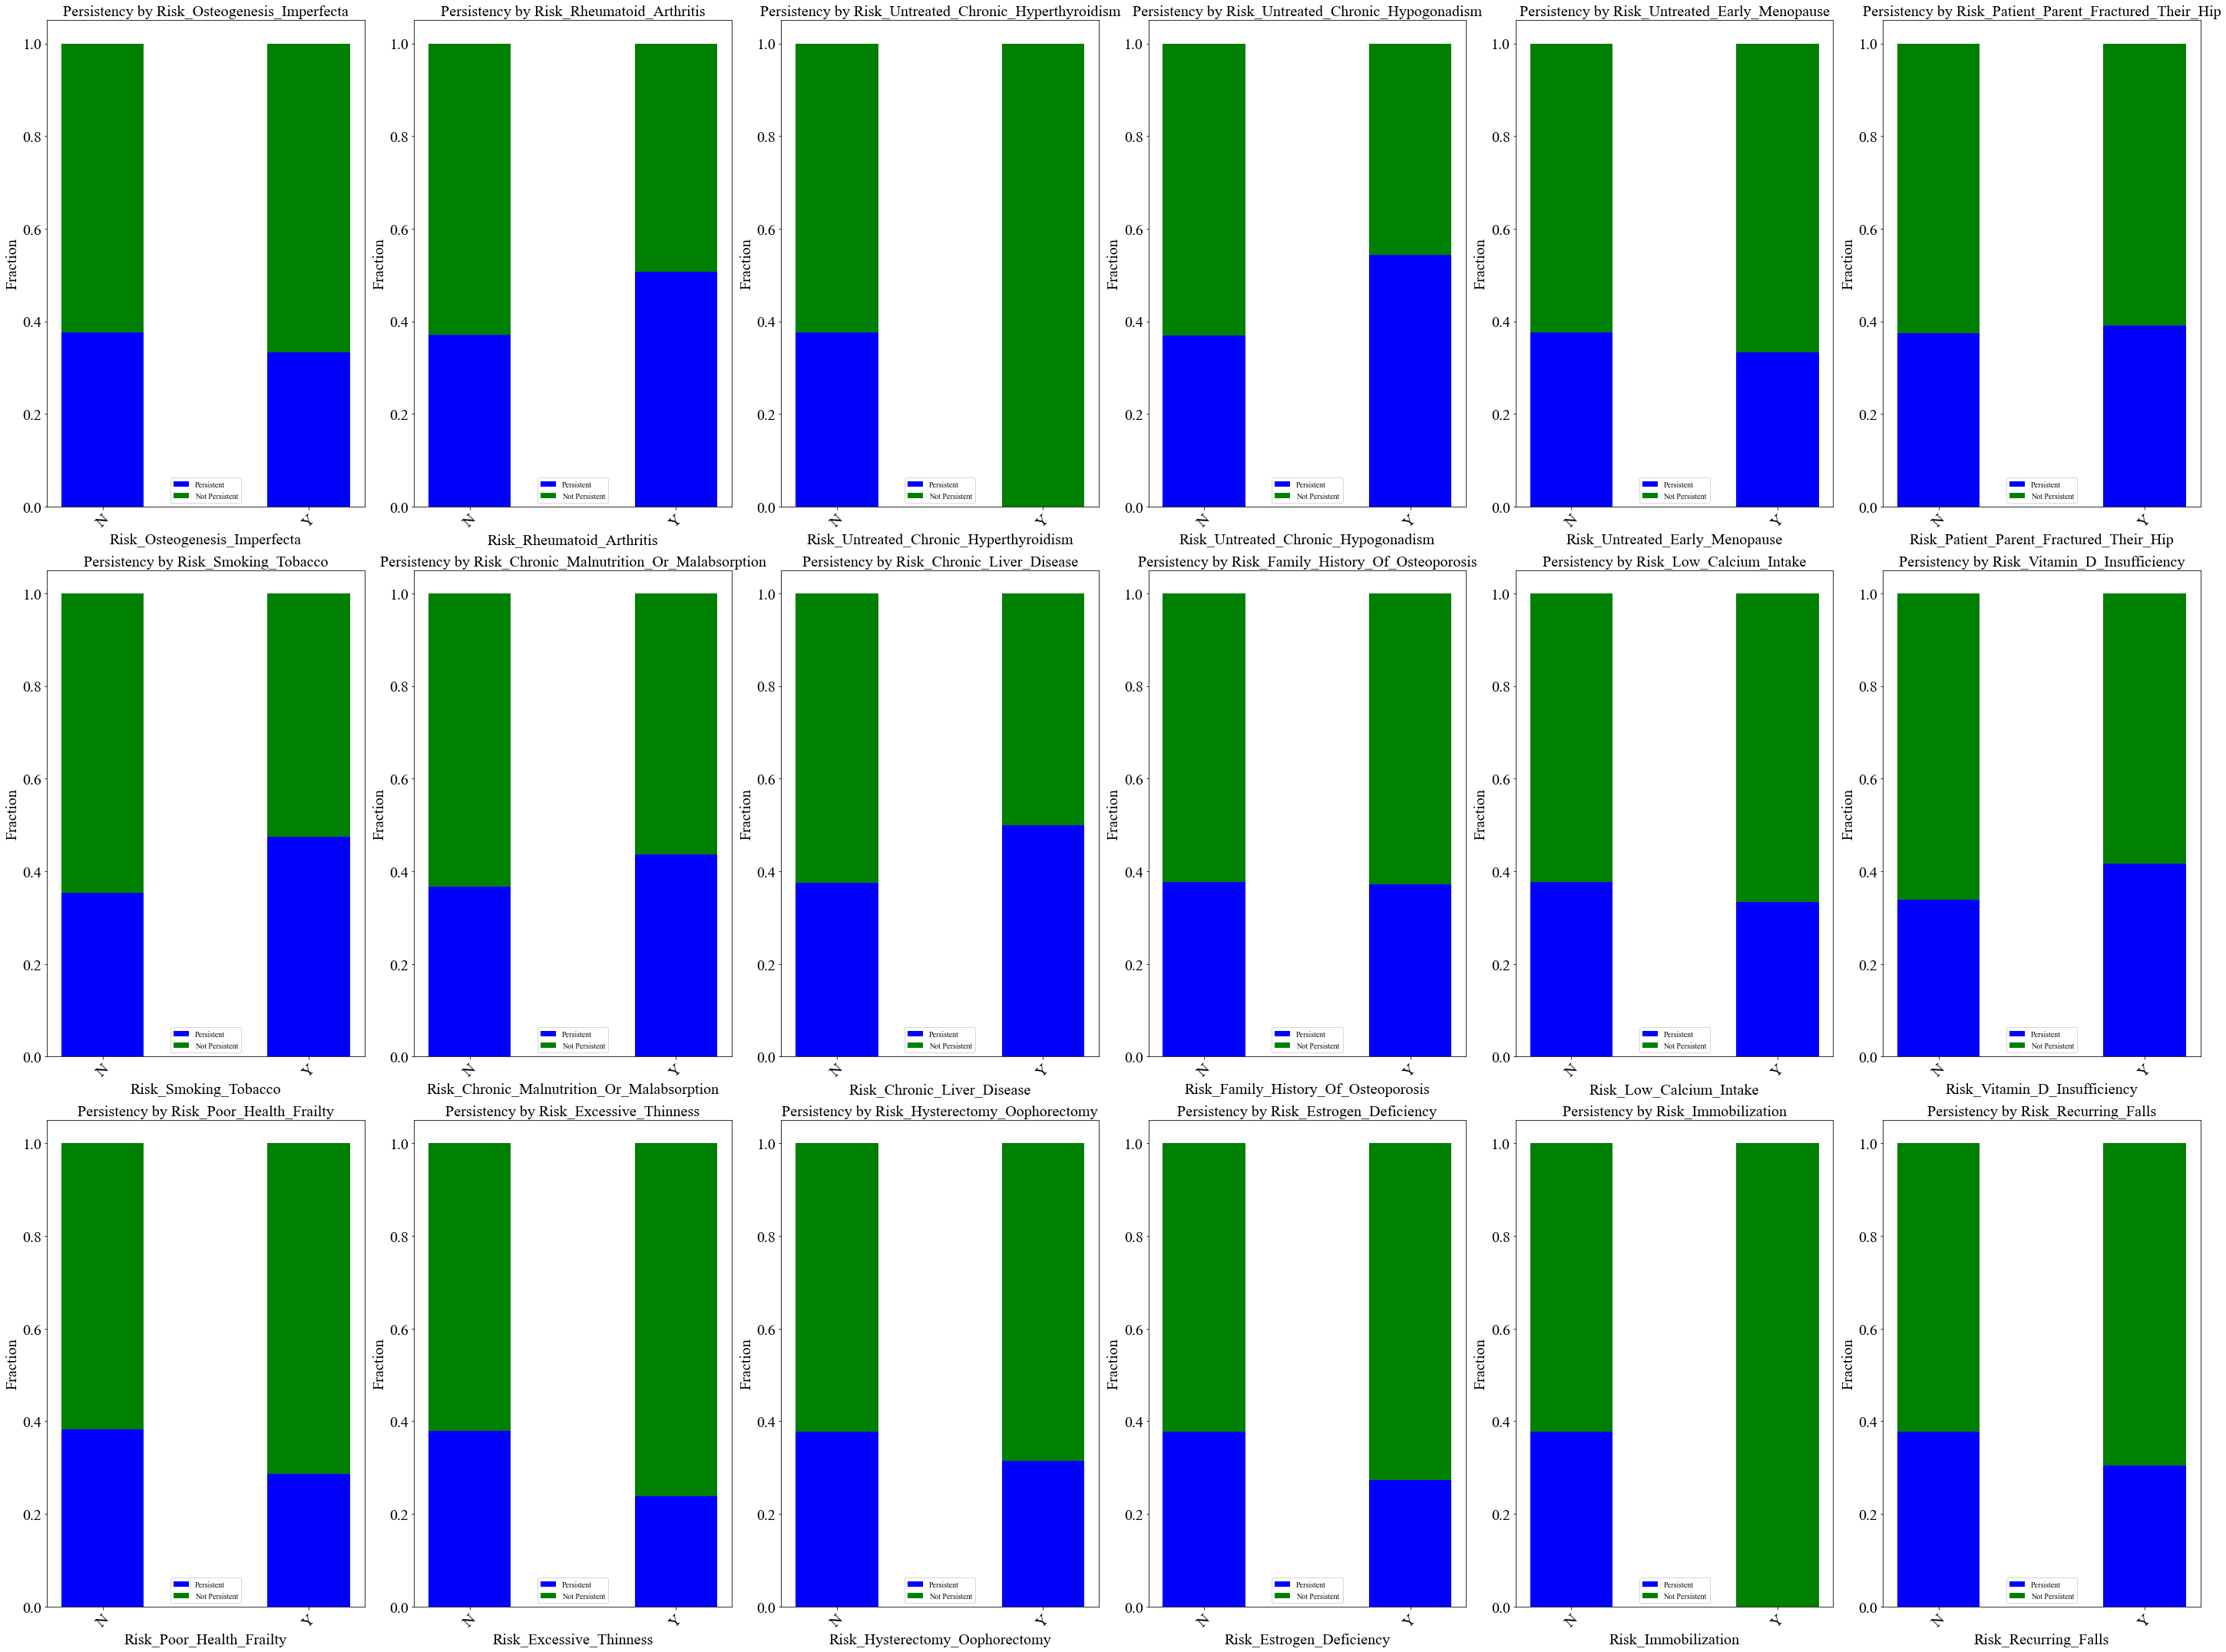

In [146]:
# Define your demographics labels and categories
demographics_labels = {
    'Risk_Osteogenesis_Imperfecta':['N','Y'], 'Risk_Rheumatoid_Arthritis':['N','Y'],
       'Risk_Untreated_Chronic_Hyperthyroidism':['N','Y'],
       'Risk_Untreated_Chronic_Hypogonadism':['N','Y'], 'Risk_Untreated_Early_Menopause':['N','Y'],
       'Risk_Patient_Parent_Fractured_Their_Hip':['N','Y'], 'Risk_Smoking_Tobacco':['N','Y'],
       'Risk_Chronic_Malnutrition_Or_Malabsorption':['N','Y'],
       'Risk_Chronic_Liver_Disease':['N','Y'], 'Risk_Family_History_Of_Osteoporosis':['N','Y'],
       'Risk_Low_Calcium_Intake':['N','Y'], 'Risk_Vitamin_D_Insufficiency':['N','Y'],
       'Risk_Poor_Health_Frailty':['N','Y'], 'Risk_Excessive_Thinness':['N','Y'],
       'Risk_Hysterectomy_Oophorectomy':['N','Y'], 'Risk_Estrogen_Deficiency':['N','Y'],
       'Risk_Immobilization':['N','Y'], 'Risk_Recurring_Falls':['N','Y'],
}

# Create a 2x4 grid of subplots
fig, axs = plt.subplots(3, 6, figsize=(40, 30))
plt.subplots_adjust(wspace=0.5)  # Adjust the spacing between subplots

# Demographic categories
demographics = ['Risk_Osteogenesis_Imperfecta', 'Risk_Rheumatoid_Arthritis',
       'Risk_Untreated_Chronic_Hyperthyroidism',
       'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Untreated_Early_Menopause',
       'Risk_Patient_Parent_Fractured_Their_Hip', 'Risk_Smoking_Tobacco',
       'Risk_Chronic_Malnutrition_Or_Malabsorption',
       'Risk_Chronic_Liver_Disease', 'Risk_Family_History_Of_Osteoporosis',
       'Risk_Low_Calcium_Intake', 'Risk_Vitamin_D_Insufficiency',
       'Risk_Poor_Health_Frailty', 'Risk_Excessive_Thinness',
       'Risk_Hysterectomy_Oophorectomy', 'Risk_Estrogen_Deficiency',
       'Risk_Immobilization', 'Risk_Recurring_Falls',]

# Iterate through demographics and create bar charts
for i, demographic in enumerate(demographics):
    # Get the labels and categories for the current demographic
    labels = demographics_labels[demographic]
    categories = health_another[demographic].unique()  # Assuming 'health_another' is your DataFrame
    
    # Initialize lists to store the fraction of persistent and non-persistent patients for each category
    persistent_fraction = []
    not_persistent_fraction = []
    
    # Calculate the fraction of patients for each category
    for category in categories:
        total_count = len(health_another[health_another[demographic] == category])
        persistent_count = len(health_another[(health_another[demographic] == category) & (health_another['Persistency_Flag'] == 'Persistent')])
        not_persistent_count = total_count - persistent_count
        
        # Calculate fractions
        persistent_fraction.append(persistent_count / total_count)
        not_persistent_fraction.append(not_persistent_count / total_count)
    
    # Create bar charts for the current demographic
    ax = axs[i//6, i%6]  # Get the current subplot
    x = range(len(labels))  # X-axis positions for bars
    
    ax.bar(x, persistent_fraction, width=0.4, label='Persistent', color='b', align='center')
    ax.bar(x, not_persistent_fraction, width=0.4, label='Not Persistent', color='g', bottom=persistent_fraction, align='center')
    
    ax.set_xlabel(demographic,fontsize=20)
    ax.set_ylabel('Fraction',fontsize=20)
    ax.set_title(f'Persistency by {demographic}',fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45,fontsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.legend()

# Show the subplots
plt.tight_layout()
plt.show()


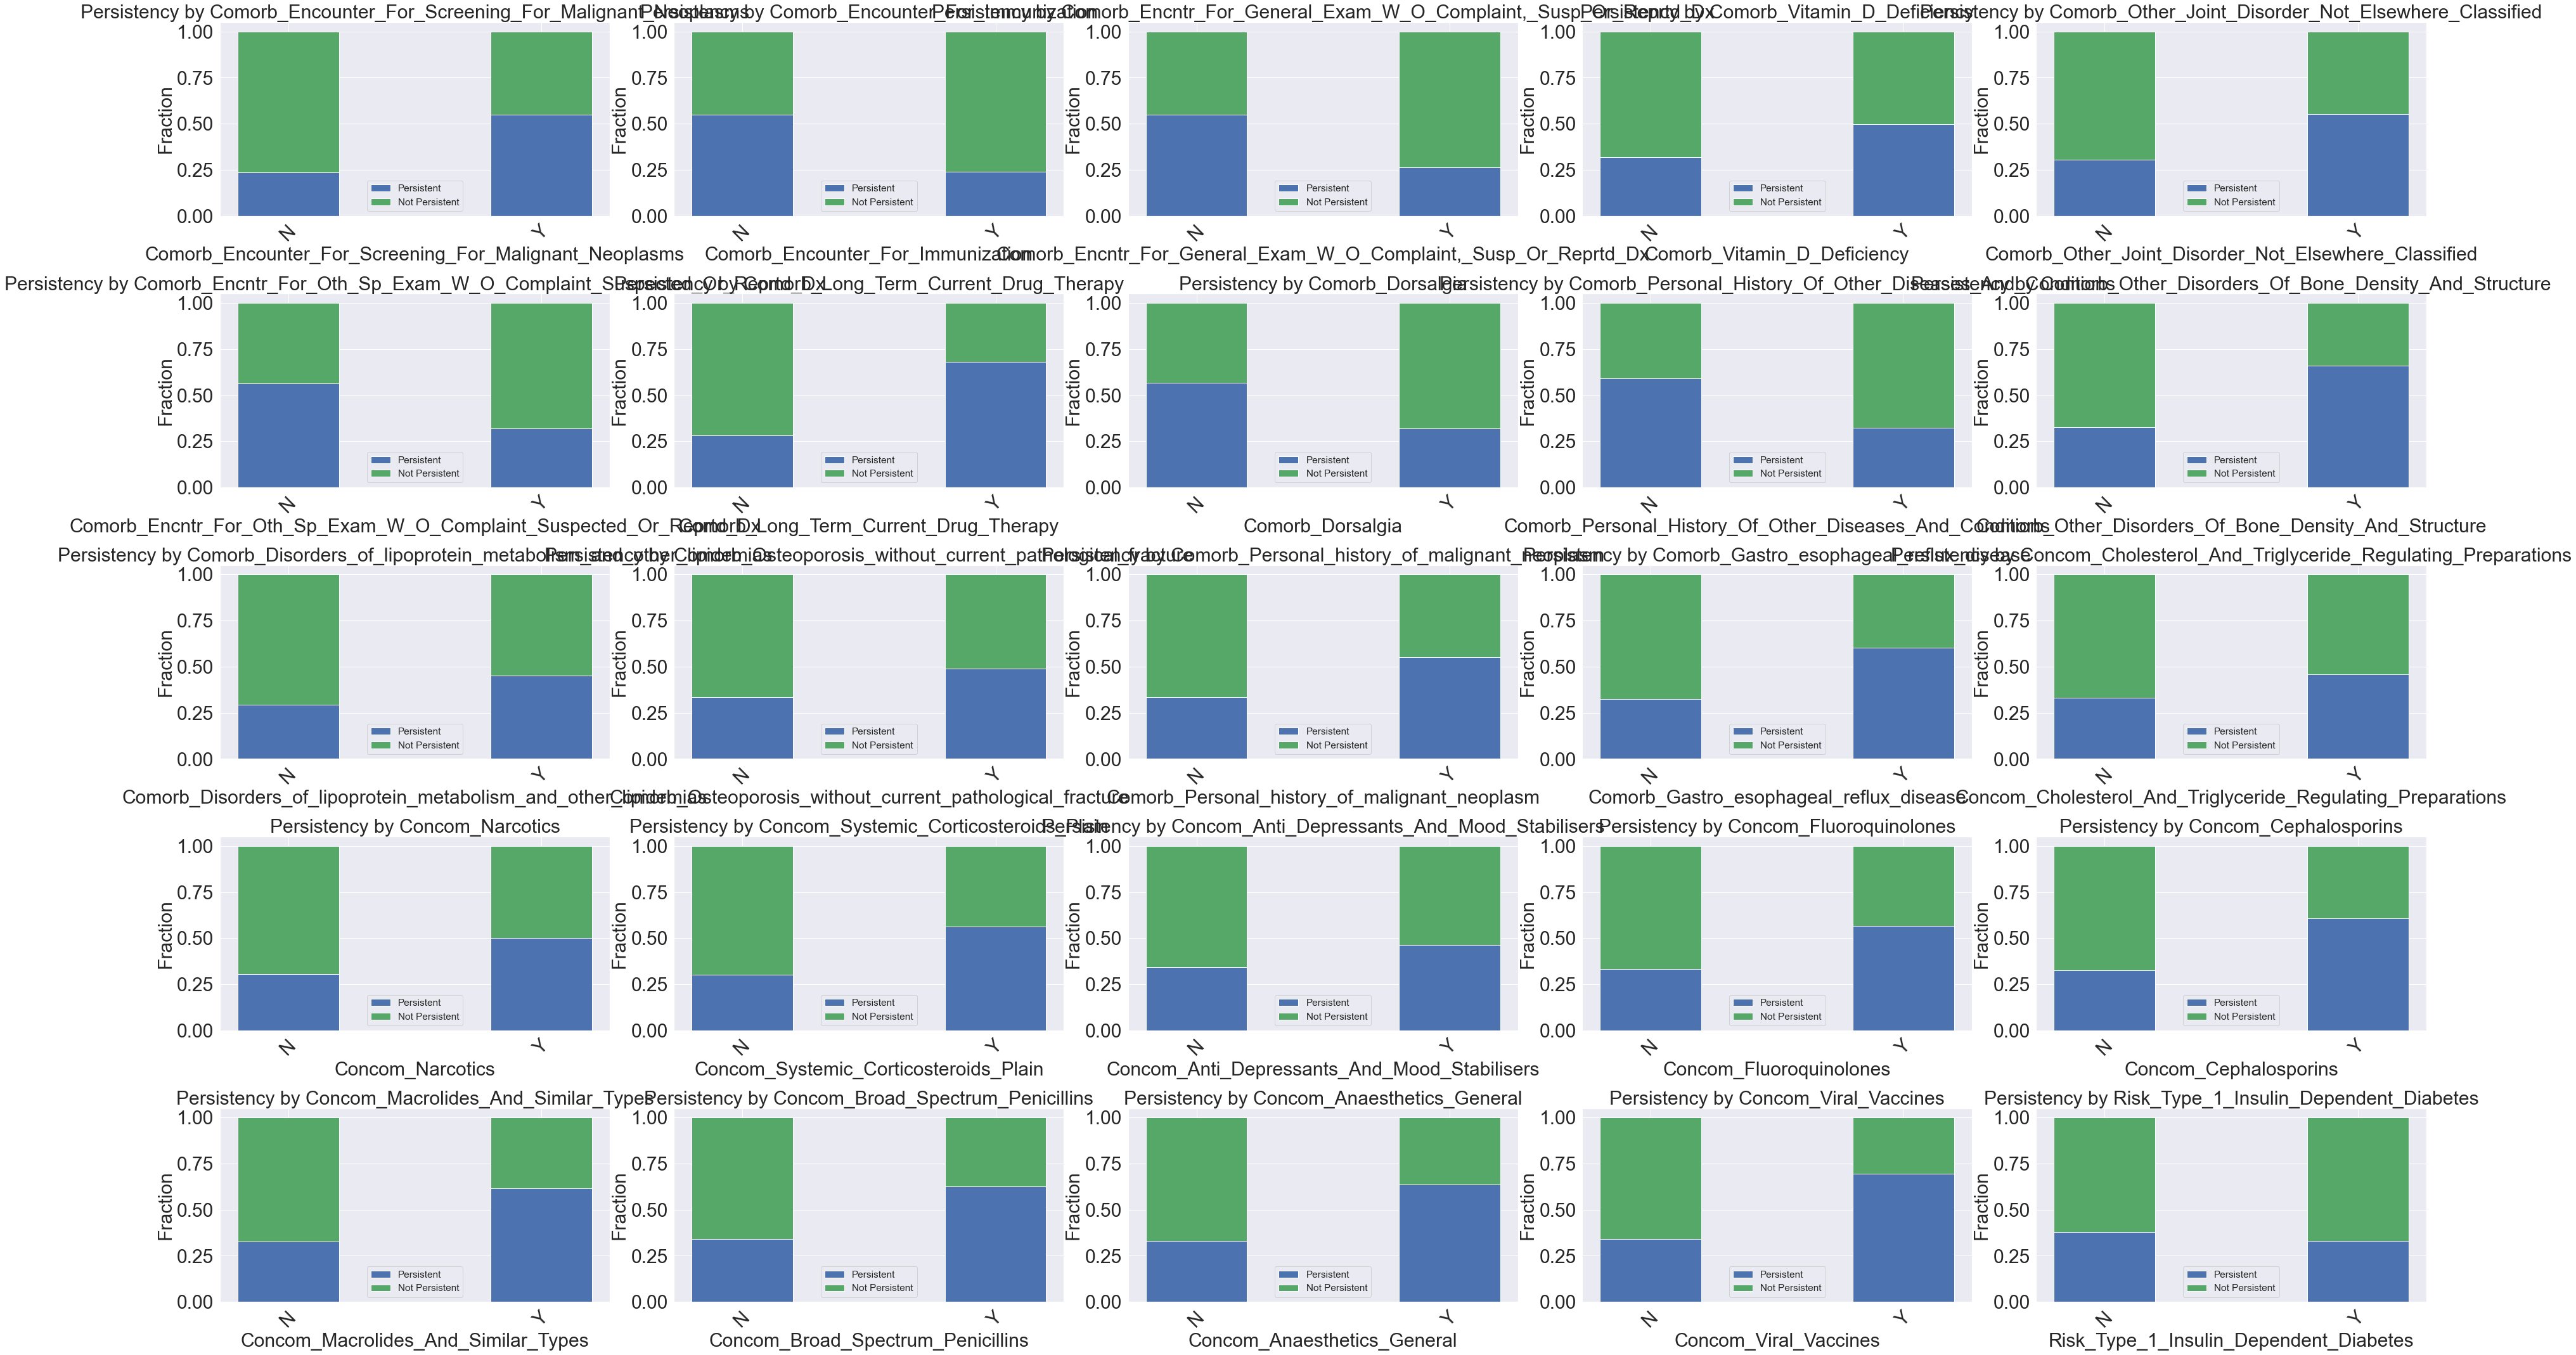

In [197]:
# Define your demographics labels and categories
demographics_labels = {
    'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms':['N','Y'],
       'Comorb_Encounter_For_Immunization':['N','Y'],
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx':['N','Y'],
       'Comorb_Vitamin_D_Deficiency':['N','Y'],
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified':['N','Y'],
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx':['N','Y'],
       'Comorb_Long_Term_Current_Drug_Therapy':['N','Y'], 'Comorb_Dorsalgia':['N','Y'],
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions':['N','Y'],
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure':['N','Y'],
       'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias':['N','Y'],
       'Comorb_Osteoporosis_without_current_pathological_fracture':['N','Y'],
       'Comorb_Personal_history_of_malignant_neoplasm':['N','Y'],
       'Comorb_Gastro_esophageal_reflux_disease':['N','Y'],
       'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations':['N','Y'],
       'Concom_Narcotics':['N','Y'], 'Concom_Systemic_Corticosteroids_Plain':['N','Y'],
       'Concom_Anti_Depressants_And_Mood_Stabilisers':['N','Y'],
       'Concom_Fluoroquinolones':['N','Y'], 'Concom_Cephalosporins':['N','Y'],
       'Concom_Macrolides_And_Similar_Types':['N','Y'],
       'Concom_Broad_Spectrum_Penicillins':['N','Y'], 'Concom_Anaesthetics_General':['N','Y'],
       'Concom_Viral_Vaccines':['N','Y'], 'Risk_Type_1_Insulin_Dependent_Diabetes':['N','Y'],
}

# Create a 2x4 grid of subplots
fig, axs = plt.subplots(5, 5, figsize=(50, 30))
plt.subplots_adjust(wspace=0.5)  # Adjust the spacing between subplots

# Demographic categories
demographics = ['Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'Comorb_Osteoporosis_without_current_pathological_fracture',
       'Comorb_Personal_history_of_malignant_neoplasm',
       'Comorb_Gastro_esophageal_reflux_disease',
       'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
       'Concom_Narcotics', 'Concom_Systemic_Corticosteroids_Plain',
       'Concom_Anti_Depressants_And_Mood_Stabilisers',
       'Concom_Fluoroquinolones', 'Concom_Cephalosporins',
       'Concom_Macrolides_And_Similar_Types',
       'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General',
       'Concom_Viral_Vaccines', 'Risk_Type_1_Insulin_Dependent_Diabetes',]

# Iterate through demographics and create bar charts
for i, demographic in enumerate(demographics):
    # Get the labels and categories for the current demographic
    labels = demographics_labels[demographic]
    categories = health_another[demographic].unique()  # Assuming 'health_another' is your DataFrame
    
    # Initialize lists to store the fraction of persistent and non-persistent patients for each category
    persistent_fraction = []
    not_persistent_fraction = []
    
    # Calculate the fraction of patients for each category
    for category in categories:
        total_count = len(health_another[health_another[demographic] == category])
        persistent_count = len(health_another[(health_another[demographic] == category) & (health_another['Persistency_Flag'] == 'Persistent')])
        not_persistent_count = total_count - persistent_count
        
        # Calculate fractions
        persistent_fraction.append(persistent_count / total_count)
        not_persistent_fraction.append(not_persistent_count / total_count)
    
    # Create bar charts for the current demographic
    row_index = i // 5  # Calculate the row index
    col_index = i % 5   # Calculate the column index
    ax = axs[row_index, col_index] 
    x = range(len(labels))  # X-axis positions for bars
    
    ax.bar(x, persistent_fraction, width=0.4, label='Persistent', color='b', align='center')
    ax.bar(x, not_persistent_fraction, width=0.4, label='Not Persistent', color='g', bottom=persistent_fraction, align='center')
    
    ax.set_xlabel(demographic,fontsize=30)
    ax.set_ylabel('Fraction',fontsize=30)
    ax.set_title(f'Persistency by {demographic}',fontsize=30)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45,fontsize=30)
    ax.tick_params(axis='y', labelsize=30)
    ax.legend()

# Show the subplots
plt.tight_layout()
plt.show()

In [156]:
health_another

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,N,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,N,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,N,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,N,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,Y,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,N,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,N,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,N,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,GENERAL PRACTITIONER,Others,N,...,N,N,N,N,N,N,N,N,N,0


In [189]:

from sklearn.preprocessing import LabelEncoder

# Initialize a dictionary to store encoders for each column
encoders = {}

# Loop through the categorical columns and encode them
for column in features_selected:
    encoder = LabelEncoder()
    health_another[column] = encoder.fit_transform(health_another[column])
    encoders[column] = encoder  # Store the encoder for future use if needed
    

health_another_new = health_another.drop(columns=['Ptid'])

# Assuming 'health_another' is your DataFrame
health_another_new['Persistency_Flag'] = health_another_new['Persistency_Flag'].map({'Non-Persistent': 0, 'Persistent': 1})



correlation_values = health_another_new.corr()['Persistency_Flag'].drop('Persistency_Flag')

# Get the top 20 features with highest correlation values
top_10 = correlation_values.abs().nlargest(10)




top_10

Dexa_During_Rx                                                     0.491823
Dexa_Freq_During_Rx                                                0.390546
Comorb_Long_Term_Current_Drug_Therapy                              0.352760
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms             0.322320
Comorb_Encounter_For_Immunization                                  0.314887
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx    0.289828
Comorb_Other_Disorders_Of_Bone_Density_And_Structure               0.247283
Concom_Systemic_Corticosteroids_Plain                              0.242854
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified               0.233279
Concom_Anaesthetics_General                                        0.222293
Name: Persistency_Flag, dtype: float64

In [193]:
# Sample data (replace this with your actual data)
top_10_data = {
    'Feature': top_10.index,  # Use the index of your series as feature names
    'Correlation': top_10.values  # The correlation values from your series
}

# Create a DataFrame
top_10_df = pd.DataFrame(top_10_data)

# Print the DataFrame
top_10_df

,Feature,Correlation
0,Dexa_During_Rx,0.491823
1,Dexa_Freq_During_Rx,0.390546
2,Comorb_Long_Term_Current_Drug_Therapy,0.352760
3,Comorb_Encounter_For_Screening_For_Malignant_N...,0.322320
4,Comorb_Encounter_For_Immunization,0.314887
5,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_...",0.289828
6,Comorb_Other_Disorders_Of_Bone_Density_And_Str...,0.247283
7,Concom_Systemic_Corticosteroids_Plain,0.242854
8,Comorb_Other_Joint_Disorder_Not_Elsewhere_Clas...,0.233279
9,Concom_Anaesthetics_General,0.222293


In [167]:
health_another_new

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,1,1,2,1,4,3,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,4,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,0,0,1,5,0,0,0,...,0,1,0,0,0,0,0,0,0,2
3,0,0,2,1,0,3,5,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2,1,0,3,5,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,1,0,2,1,2,3,5,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3420,1,0,2,1,2,3,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3421,1,0,2,1,2,3,3,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3422,0,0,2,1,2,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


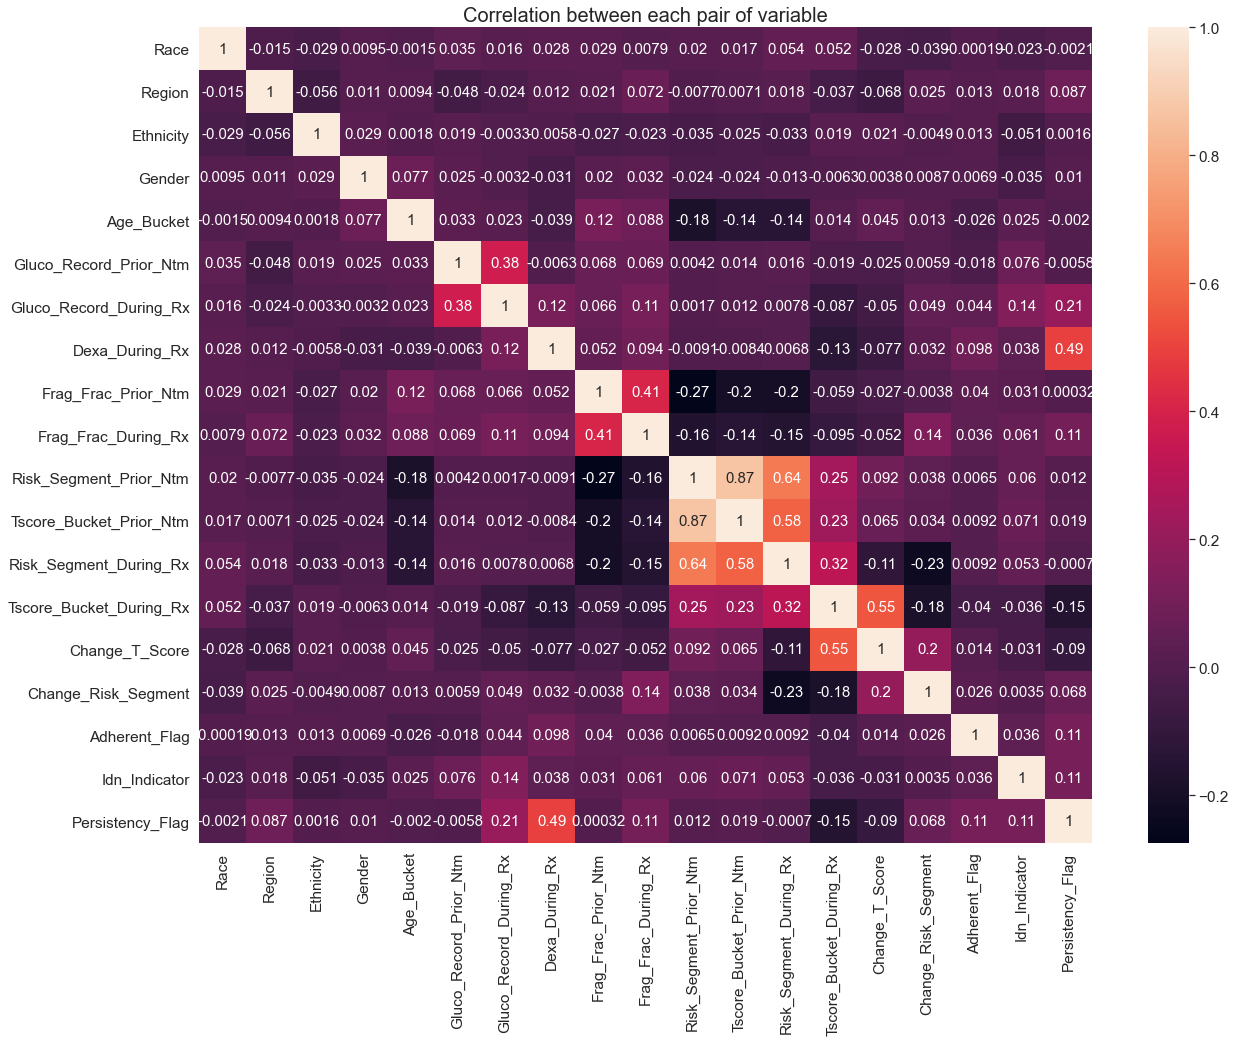

In [194]:
import seaborn as sns

selected1 = health_another_new[['Race', 'Region', 'Ethnicity', 'Gender', 'Age_Bucket','Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx',
  'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator','Persistency_Flag']]

corr1 = selected1.corr()

# plot the heatmap

fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(corr1, xticklabels=corr1.columns,yticklabels=corr1.columns,annot=True,ax=ax,annot_kws={"size": 15})
ax.set_title('Correlation between each pair of variable',size=20)
sns.set(font_scale=1.4)

## Insights:

1. **Demographic Factors:**
   - **Age:** Patients aged over 75 years tend to have a higher rate of drug persistency. This suggests that age is a significant factor influencing drug adherence. 
   - **Gender:** Females are more likely to be persistent in taking medications. Understanding the reasons behind this gender difference can help tailor interventions.
   - **Region and Ethnicity:** Patients from the midwest region and those with ethnicity not Hispanic exhibit higher drug persistency rates. Explore region-specific healthcare practices and cultural factors that contribute to this trend.

2. **Clinical Factors:**
   - **Gluco_Record_During_Rx:** Patients with glucose records during treatment are more likely to be persistent. Ensuring regular monitoring of relevant clinical parameters could improve adherence.
   - **Dexa_During_Rx:** Patients receiving DEXA scans during treatment are more persistent. Consider promoting the importance of bone density monitoring.
   - **Frag_Frac_During_Rx:** Patients with fragility fractures during treatment show higher persistency. Identify patients at risk of fractures and provide appropriate interventions.
   - **Change_T_Score and Adherent_Flag:** Patients showing improvement in T-score and adherence tend to be more persistent. Implement strategies to enhance patient education and engagement in treatment plans.
   - **Idn_Indicator:** Patients mapped to an Integrated Delivery Network (IDN) are more likely to be persistent. Collaborate with IDNs to understand their practices that contribute to better persistency.

3. **Risk Factors and Comorbidities:**
   - Patients with certain risk factors such as 'Risk_Poor_Health_Frailty' and 'Risk_Recurring_Falls' are less likely to be persistent. Tailor interventions for patients with these risk factors to improve adherence.
   - Patients with specific comorbidities like 'Comorb_Encounter_For_Immunization' and 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx' exhibit lower drug persistency. Address comorbidity-related challenges in treatment plans.

4. **Correlation Analysis:**
   - Features highly correlated with drug persistency, such as 'Dexa_During_Rx' and 'Dexa_Freq_During_Rx,' should be given special attention in model development.
   - Understanding the clinical relevance of these features can help healthcare providers tailor interventions.


In [198]:
from sklearn.model_selection import train_test_split

#split the dataset into training and testing data set
X=health_another_new.iloc[:,2:67]
y=health_another_new['Persistency_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [204]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Create a dummy classifier
dummy = DummyClassifier(strategy='uniform')  # Other strategies: 'stratified', 'most_frequent', 'constant'

# Train the classifier
dummy.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dummy.predict(X_test)

# Calculate accuracy
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.49      0.55       427
           1       0.39      0.54      0.45       258

    accuracy                           0.51       685
   macro avg       0.51      0.51      0.50       685
weighted avg       0.54      0.51      0.51       685



In [202]:
# Logistic regression clsssifier (initial version)
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


clf_lgr = LogisticRegression() # Linear Kernel

#Train the model using the training sets
clf_lgr.fit(X_train, y_train)
#making predictions using testing sets
predictions_lgr = clf_lgr.predict(X_test)
#produce classification matrix
print(classification_report(y_test,predictions_lgr))

#confusion matrix
pd.crosstab(y_test, predictions_lgr, rownames=["Actual"], colnames=["Predicted"])

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       427
           1       0.78      0.70      0.74       258

    accuracy                           0.81       685
   macro avg       0.81      0.79      0.80       685
weighted avg       0.81      0.81      0.81       685



/Users/elenayun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predicted,0,1
Actual,,
0,377,50
1,78,180


In [172]:
#support vector model(svm) (initial version)
from sklearn import svm

#svm model
clf_svm = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf_svm.fit(X_train, y_train)
#making predictions using testing sets
predictions_svm = clf_svm.predict(X_test)
#produce classification matrix
print(classification_report(y_test,predictions_svm))
#confusion matrix
pd.crosstab(y_test, predictions_svm, rownames=["Actual"], colnames=["Predicted"])

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       417
           1       0.83      0.62      0.71       268

    accuracy                           0.80       685
   macro avg       0.81      0.77      0.78       685
weighted avg       0.80      0.80      0.79       685



Predicted,0,1
Actual,,
0,383,34
1,103,165


In [173]:
#random forest model (rf) (initial version)
from sklearn.ensemble import RandomForestClassifier

#random forest model
clf_rf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)

#produce true vs predicted label 
predictions_rf = clf_rf.predict(X_test)
#produce classification matrix
print(classification_report(y_test,predictions_rf))
#confusion matrix
pd.crosstab(y_test, predictions_rf, rownames=["Actual"], colnames=["Predicted"])

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       417
           1       0.89      0.50      0.64       268

    accuracy                           0.78       685
   macro avg       0.82      0.73      0.74       685
weighted avg       0.80      0.78      0.76       685



Predicted,0,1
Actual,,
0,400,17
1,134,134


In [203]:
from sklearn.ensemble import GradientBoostingClassifier


#random forest model (initial version)
clf_gb =  GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42).fit(X_train, y_train)

#produce true vs predicted label 
predictions_gb = clf_gb.predict(X_test)
#produce classification matrix
print(classification_report(y_test,predictions_gb))
#confusion matrix
pd.crosstab(y_test, predictions_gb, rownames=["Actual"], colnames=["Predicted"])

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       427
           1       0.80      0.71      0.75       258

    accuracy                           0.82       685
   macro avg       0.82      0.80      0.81       685
weighted avg       0.82      0.82      0.82       685



Predicted,0,1
Actual,,
0,381,46
1,76,182
